# TME 8: Split
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! 


In [1]:
from PIL import Image
from pylab import *

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)>=2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



## Exercice 1

Question 1: 
Écrire la fonction récursive ``split()`` vue en TD. Elle prend en entrée l'image, une région, un prédicat, et un nombre variable d'arguments. La région est de type formel Python ```Bloc``` défini par :
```python
type Bloc = tuple[int**4]
```
La fonction ``split()`` retourne un arbre 4-aire de type formel Python, défini récursivement par:
```python
type 4-aire = list[(4-aire**4|Bloc)] 
```
Le prédicat est une fonction Python de signature:
```python
Array*Bloc*...->bool
```
Elle peut prendre un nombre variable de paramètres qui correspond aux paramètres du prédicat.


In [69]:
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
    x, y, width, height = reg
    
    if(pred(I, reg, *args) and width > 2 and height > 2):

        
        width_child, height_child = width//2, height//2
                

        # Nord ouest
        NO = split(I, (x, y, width_child, height_child), pred, *args)
        # Nord est
        NE = split(I, (x + width_child, y, width_child, height_child), pred, *args)
        # Sud Ouest
        SO = split(I, (x, y+height_child, width_child, height_child), pred, *args)
        # Sud Est
        SE = split(I, (x + width_child, y + height_child, width_child, height_child), pred, *args)
        
        
        return [NO, NE, SO, SE]

    return [reg]
        

Question 2:
Écrire la fonction ```predsplit1(I,B,*args)``` de signature :
```python
Array*Bloc*... -> bool
```
qui retourne True si l'écart-type de l'image ``I`` calculé sur la région ``B`` est plus grand que la valeur du premier argument de ``*args`` (on y accède simplement par ``*args[0]``).

In [70]:
def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """ 
    x, y, width, height = reg
    
#     print("x = ", x, "y = ", y)
    # variation supereir a un threshhold
    return I[y:y+height, x:x+width].std() > args[0]
    

Question 3: Écrire la fonction ``splitprof(L)`` qui réaliste un parcours (récursif) en profondeur de l'arbre 4-aire passé en paramètre. La fonction retourne la liste des feuilles de ``L``, soit une liste de bloc.

In [83]:
def splitprof(L):
    """ 4-aire -> list[Bloc]"""
    
    if(len(L) == 1):
        x, y, width, height = L[0]
        #print("hoein")
        return L

    childs = []
    for i in range(4):
        #print("L is = ", L[i])
        childs += splitprof(L[i])
        
    return childs

Question 4: Tester vos codes sur l'image test ``img_test`` vue en TD. Imprimer la valeur retournée par ``split()`` ainsi que celle retournée par ``profsplit()``. 

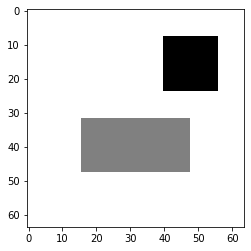

[
	 [(0, 0, 32, 32)]
	 [[[(32, 0, 8, 8)], [(40, 0, 8, 8)], [(32, 8, 8, 8)], [(40, 8, 8, 8)]], [[(48, 0, 8, 8)], [(56, 0, 8, 8)], [(48, 8, 8, 8)], [(56, 8, 8, 8)]], [[(32, 16, 8, 8)], [(40, 16, 8, 8)], [(32, 24, 8, 8)], [(40, 24, 8, 8)]], [[(48, 16, 8, 8)], [(56, 16, 8, 8)], [(48, 24, 8, 8)], [(56, 24, 8, 8)]]]
	 [[(0, 32, 16, 16)], [(16, 32, 16, 16)], [(0, 48, 16, 16)], [(16, 48, 16, 16)]]
	 [[(32, 32, 16, 16)], [(48, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 48, 16, 16)]]
]

Feuilles :  [(0, 0, 32, 32), (32, 0, 8, 8), (40, 0, 8, 8), (32, 8, 8, 8), (40, 8, 8, 8), (48, 0, 8, 8), (56, 0, 8, 8), (48, 8, 8, 8), (56, 8, 8, 8), (32, 16, 8, 8), (40, 16, 8, 8), (32, 24, 8, 8), (40, 24, 8, 8), (48, 16, 8, 8), (56, 16, 8, 8), (48, 24, 8, 8), (56, 24, 8, 8), (0, 32, 16, 16), (16, 32, 16, 16), (0, 48, 16, 16), (16, 48, 16, 16), (32, 32, 16, 16), (48, 32, 16, 16), (32, 48, 16, 16), (48, 48, 16, 16)]


In [84]:
split_test = split(img_test, (0, 0, img_test.shape[1], img_test.shape[0]), predsplit1, 0.)
split_prof_test = splitprof(split_test)

plt.imshow(img_test, cmap="gray")
plt.show()
print("[")
for i in split_test:
    print("\t", i)
print("]")
print("")
print("Feuilles : ", split_prof_test)

Question 4: Écrire la fonction ```splitdraw(L,I)``` qui prend en paramètre une liste de bloc et une image et retourne une image dont les bords de chaque éléments de ``L`` ont été dessiné en rouge. Indication: l'image retournée est une hypermatrice de dimension 3, la troisième dimension a une taille de 3 et correspond aux composantes rouge, verte et bleue d'une image RGB. Tester son bon fonctionnement sur l'exemple précédent.


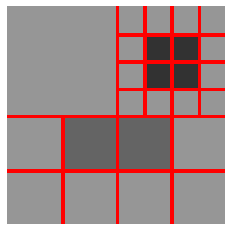

In [119]:
def splitdraw(LL,I):
    """ list[Bloc]*Array -> Array
        parcours de la liste dessin des régions 
    """
    I_copy = np.zeros_like(I)
    
#     cols = 5
#     rows = len(LL)//cols
    
#     fig1, f1_axes = plt.subplots(ncols=cols, nrows=rows, constrained_layout=True, figsize=(30,20))
    
    for i, reg in enumerate(LL):
        
        x, y, width, height = reg
        
        I_copy[y:y+height, x:x+width, 0] = I[y:y+height, x:x+width, 0].mean()
        I_copy[y:y+height, x:x+width, 1] = I[y:y+height, x:x+width, 1].mean()
        I_copy[y:y+height, x:x+width, 2] = I[y:y+height, x:x+width, 2].mean()
        
        if(y != 0):
        #horizontal
            I_copy[y, x:x+width, 0] = 255
            I_copy[y, x:x+width, 1] = 0
            I_copy[y, x:x+width, 2] = 0
        
        if(x != 0):
        #verticla
            I_copy[y:y+height, x, 0] = 255
            I_copy[y:y+height, x, 1] = 0
            I_copy[y:y+height, x, 2] = 0
        
        #affichage_14([RGB/255],['titre'])
#         row = i // cols 
#         col = i % cols
        
#     f1_axes[row, col].imshow(I_copy/255)
#     f1_axes[row, col].axis("off")
    plt.imshow(I_copy/255)
    plt.axis("off")
    plt.show()
# exemple image RGB et dessin d'une ligne rouge.
RGB = zeros((64,64,3))
RGB[:,:,0] = img_test
RGB[:,:,1] = img_test
RGB[:,:,2] = img_test


split_test = split(img_test, (0, 0, img_test.shape[1], img_test.shape[0]), predsplit1, 0.2)
split_prof_test = splitprof(split_test)
splitdraw(split_prof_test, RGB)

Question 5: Ajouter un bruit gaussien sur l'image ``img_test`` d'écart-type 5. Recalculer un découpage 4-aire sur l'image bruitée en ajustant le seuil de façon à obtenir le même résultat que dans la question précédente. Quelle valeur de seuil a-t-il fallut choisir ? Cela vous semble-t-il cohérent ?

Indication: utiliser la fonction Numpy ``random.randn()`` qui génère des valeurs aléatoires tirées selon une loi normale (loi gaussienne de moyenne nulle et de variance 1). Pour obtenir des réalisations d'une gaussienne d'écart type $\sigma$, il suffit de faire des tirages d'une loi normale, multipliés par $\sigma$. 

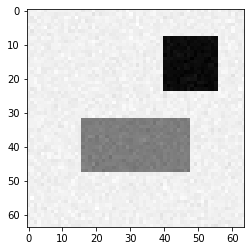

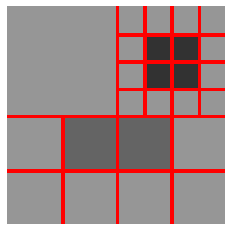

In [129]:
from numpy import random


noise = random.randn(img_test.shape[0], img_test.shape[1]) * 2

img_test_noise = img_test + noise
plt.imshow(img_test_noise, cmap="gray")
plt.show()


RGB = zeros((img_test.shape[0], img_test.shape[1],3))
RGB[:,:,0] = img_test
RGB[:,:,1] = img_test
RGB[:,:,2] = img_test


split_test = split(img_test_noise, (0, 0, img_test.shape[1], img_test.shape[0]), predsplit1, 2.3)
split_prof_test = splitprof(split_test)
splitdraw(split_prof_test, RGB)

# Exercice 2
Question 1:
Expérimenter l'algorithme de split sur les 5 images naturelles fournies. Pour chaque image essayer de trouver le seuil qui vous semble visuellement le meilleur. Afficher le nombre de bloc obtenus après découpage.

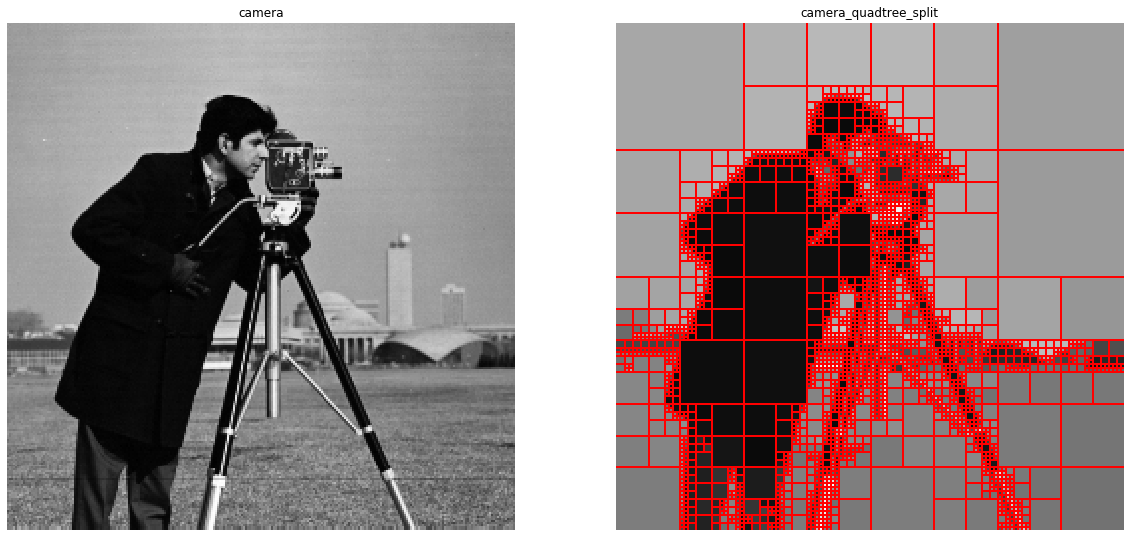

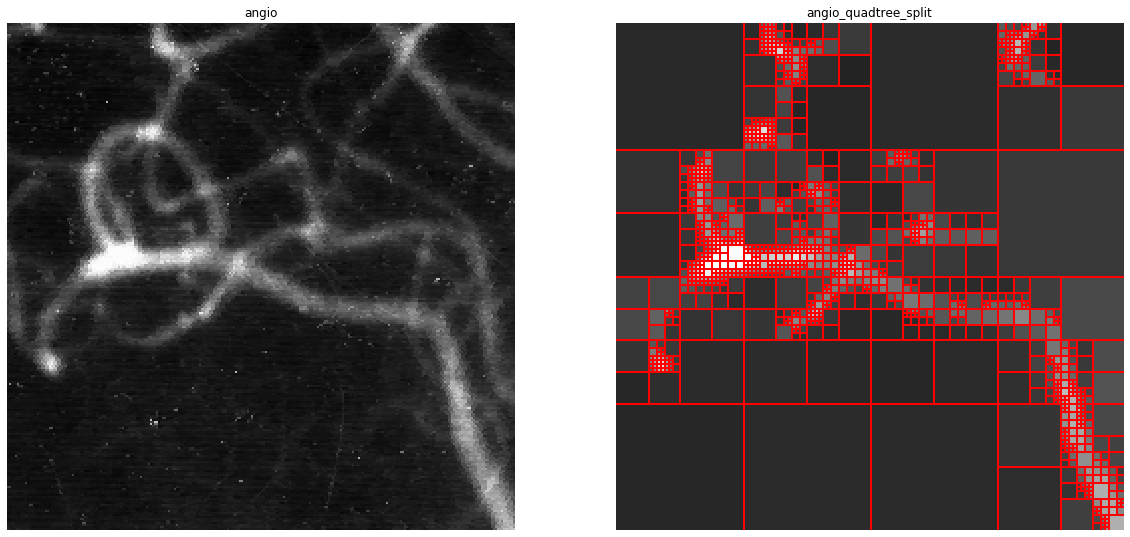

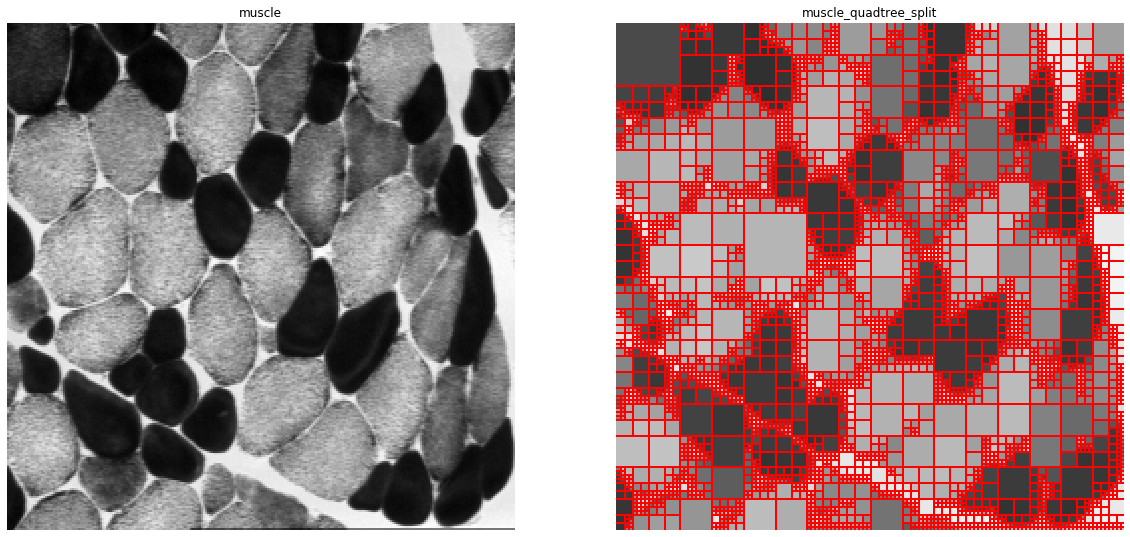

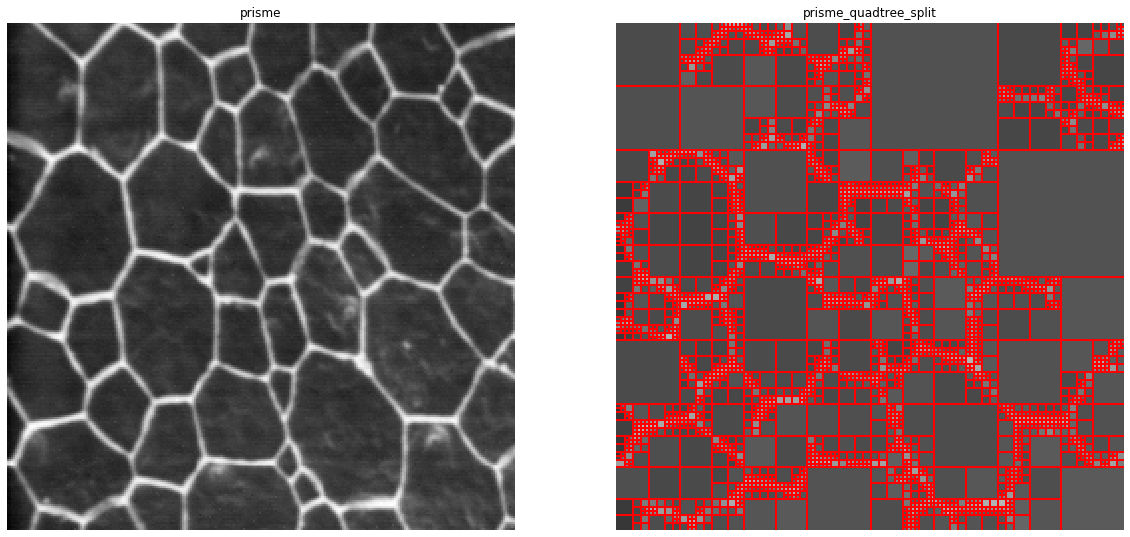

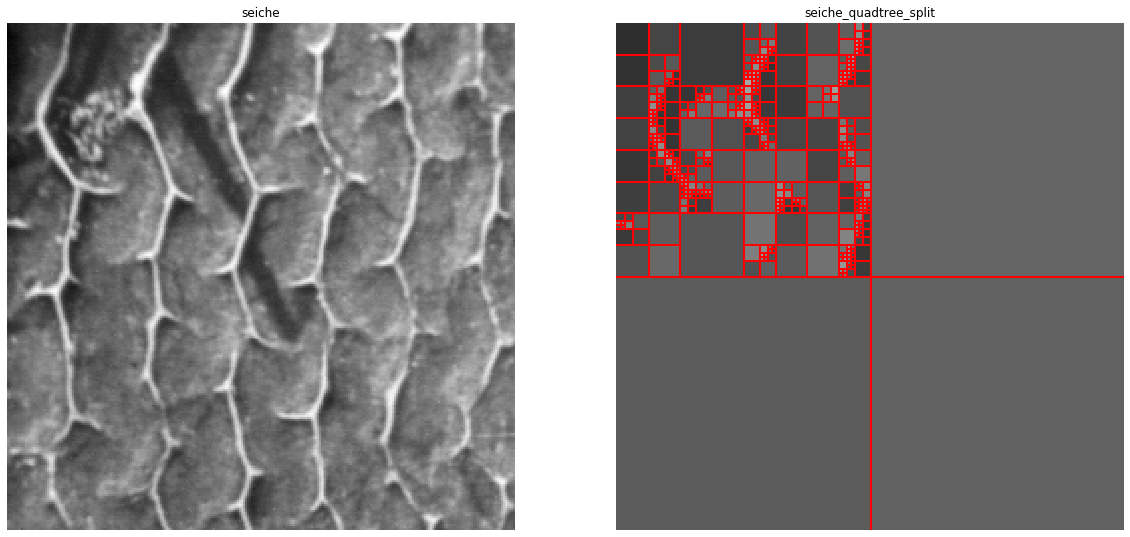

In [144]:
imgs = {"camera": cam, "angio": angio, "muscle": muscle, "prisme": prisme, "seiche": seiche}

def split_img_show(imgs):
    """
        dict[str*numpy]
    """
    
    for title, img in imgs.items():
        

        plt.figure(figsize=(20,20))

        noise = random.randn(img.shape[0], img.shape[1]) * 1

        img_noise = img + noise
        
        plt.subplot(121)
        plt.imshow(img_noise, cmap="gray")
        plt.title(title)
        plt.axis("off")


        RGB = zeros((img.shape[0], img.shape[1],3))
        RGB[:,:,0] = img
        RGB[:,:,1] = img
        RGB[:,:,2] = img

        plt.subplot(122)
        plt.title(title + "_quadtree_split")
        split_test = split(img_noise, (0, 0, img.shape[1], img.shape[0]), predsplit1, 20)
        split_prof_test = splitprof(split_test)
        splitdraw(split_prof_test, RGB)

split_img_show(imgs)

Question 2 (bonus): proposer un critère de découpage alternatif. Par exemple, un critère basé sur des contours ou un autre. Le critère peut être adapté à chaque type d'image.
